In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns 
import sys
import os
import math

# Ajusta para mostrar todos os valores
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_seq_items', None) 

In [ ]:
#teste 

In [2]:
FlightsDB = pd.read_csv('../data/DM_AIAI_FlightsDB.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../data/DM_AIAI_FlightsDB.csv'

In [32]:
FlightsDB.head()

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
0,413052,2021,12,12/1/2021,2.0,2.0,9384.0,938.0,0.0,0.0
1,464105,2021,12,12/1/2021,0.0,0.0,0.0,0.0,0.0,0.0
2,681785,2021,12,12/1/2021,10.0,3.0,14745.0,1474.0,0.0,0.0
3,185013,2021,12,12/1/2021,16.0,4.0,26311.0,2631.0,3213.0,32.0
4,216596,2021,12,12/1/2021,9.0,0.0,19275.0,1927.0,0.0,0.0


In [33]:
FlightsDB.tail()

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
608431,999902,2019,12,12/1/2019,7.2,0.0,30766.5,3076.65,0.0,0.0
608432,999911,2019,12,12/1/2019,0.0,0.0,0.0,0.00,0.0,0.0
608433,999940,2019,12,12/1/2019,14.4,0.9,18261.0,1826.10,0.0,0.0
608434,999982,2019,12,12/1/2019,0.0,0.0,0.0,0.00,0.0,0.0
608435,999986,2019,12,12/1/2019,0.0,0.0,0.0,0.00,0.0,0.0


In [34]:
FlightsDB.shape

(608436, 10)

In [35]:
FlightsDB.columns

Index(['Loyalty#', 'Year', 'Month', 'YearMonthDate', 'NumFlights',
       'NumFlightsWithCompanions', 'DistanceKM', 'PointsAccumulated',
       'PointsRedeemed', 'DollarCostPointsRedeemed'],
      dtype='object')

In [36]:
FlightsDB.dtypes

Loyalty#                      int64
Year                          int64
Month                         int64
YearMonthDate                object
NumFlights                  float64
NumFlightsWithCompanions    float64
DistanceKM                  float64
PointsAccumulated           float64
PointsRedeemed              float64
DollarCostPointsRedeemed    float64
dtype: object

The types of the following features should be:
- **'YearMonthDate'**: datetime64
- **'NumFlights'**: int64
- **'NumFlightsWithCompanions'**: int64
- **'PointsAccumulated'**: int64
- **'PointsRedeemed'**: int64

In [37]:
FlightsDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608436 entries, 0 to 608435
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Loyalty#                  608436 non-null  int64  
 1   Year                      608436 non-null  int64  
 2   Month                     608436 non-null  int64  
 3   YearMonthDate             608436 non-null  object 
 4   NumFlights                608436 non-null  float64
 5   NumFlightsWithCompanions  608436 non-null  float64
 6   DistanceKM                608436 non-null  float64
 7   PointsAccumulated         608436 non-null  float64
 8   PointsRedeemed            608436 non-null  float64
 9   DollarCostPointsRedeemed  608436 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 46.4+ MB


In [38]:
FlightsDB.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loyalty#,608436.0,NaN,NaN,NaN,550037.873084,258935.180575,100018.0,326961.0,550834.0,772194.0,999986.0
Year,608436.0,NaN,NaN,NaN,2020.0,0.816497,2019.0,2019.0,2020.0,2021.0,2021.0
Month,608436.0,NaN,NaN,NaN,6.5,3.452055,1.0,3.75,6.5,9.25,12.0
YearMonthDate,608436,36,12/1/2021,16901,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumFlights,608436.0,NaN,NaN,NaN,3.908107,5.057889,0.0,0.0,0.0,7.2,21.0
NumFlightsWithCompanions,608436.0,NaN,NaN,NaN,0.983944,2.003785,0.0,0.0,0.0,0.9,11.0
DistanceKM,608436.0,NaN,NaN,NaN,7939.341419,10260.421873,0.0,0.0,856.4,15338.175,42040.0
PointsAccumulated,608436.0,NaN,NaN,NaN,793.777781,1025.918521,0.0,0.0,85.275,1533.7125,4204.0
PointsRedeemed,608436.0,NaN,NaN,NaN,235.251678,983.233374,0.0,0.0,0.0,0.0,7496.0
DollarCostPointsRedeemed,608436.0,NaN,NaN,NaN,2.324835,9.725168,0.0,0.0,0.0,0.0,74.0


In [39]:
FlightsDB.nunique()

Loyalty#                    16737
Year                            3
Month                          12
YearMonthDate                  36
NumFlights                     41
NumFlightsWithCompanions       22
DistanceKM                  66762
PointsAccumulated           37064
PointsRedeemed               8146
DollarCostPointsRedeemed      104
dtype: int64

In [40]:
FlightsDB.nunique()==1

Loyalty#                    False
Year                        False
Month                       False
YearMonthDate               False
NumFlights                  False
NumFlightsWithCompanions    False
DistanceKM                  False
PointsAccumulated           False
PointsRedeemed              False
DollarCostPointsRedeemed    False
dtype: bool

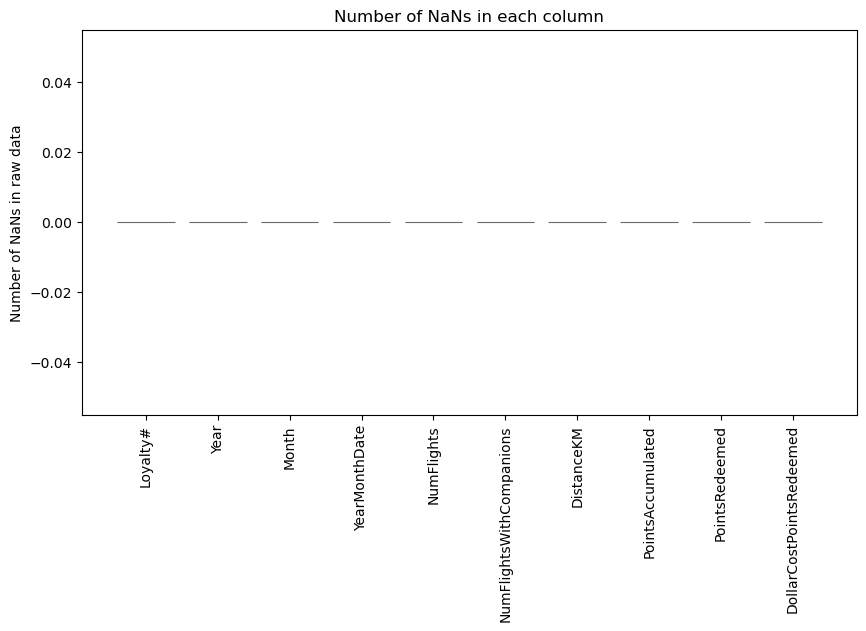

In [41]:
number_of_nans = FlightsDB.isnull().sum()
x_xis = number_of_nans.index.tolist()
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.ylabel('Number of NaNs in raw data')
plt.title('Number of NaNs in each column')
plt.bar(x=x_xis, height=number_of_nans, color='mediumaquamarine', edgecolor='dimgray', linewidth=0.8)

plt.show()

There are no missing values, so for this dataset it will not be a problem

## Data types

In [42]:
datetime = ['YearMonthDate']
for col in datetime:
    print(f'{col}: {FlightsDB[col].unique()}')

YearMonthDate: ['12/1/2021' '6/1/2020' '5/1/2020' '4/1/2020' '3/1/2020' '2/1/2020'
 '1/1/2020' '11/1/2021' '10/1/2021' '6/1/2021' '9/1/2021' '5/1/2021'
 '4/1/2021' '8/1/2021' '7/1/2021' '3/1/2021' '2/1/2021' '1/1/2021'
 '12/1/2020' '11/1/2020' '10/1/2020' '9/1/2020' '8/1/2020' '7/1/2020'
 '1/1/2019' '2/1/2019' '3/1/2019' '4/1/2019' '5/1/2019' '6/1/2019'
 '7/1/2019' '8/1/2019' '9/1/2019' '10/1/2019' '11/1/2019' '12/1/2019']


In [43]:
# Convert both columns to datetime
FlightsDB['YearMonthDate'] = pd.to_datetime(
    FlightsDB['YearMonthDate'], errors='coerce'
)


In [44]:
# List of columns to convert
int_columns = ['NumFlights', 'NumFlightsWithCompanions', 'PointsAccumulated', 'PointsRedeemed']

# Convert each column to integer, using 'Int64' for nullable integers
for col in int_columns:
    FlightsDB[col] = pd.to_numeric(FlightsDB[col], errors='coerce').astype('int64')

## Features

In [45]:
numerical_columns = FlightsDB.select_dtypes(include=['number']).columns.tolist()
numerical_columns = [col for col in numerical_columns if col != 'Loyalty#']

## YearMonthDate

In [46]:
# Extract month, day, year as integers
FlightsDB['month'] = FlightsDB['YearMonthDate'].dt.month
FlightsDB['day'] = FlightsDB['YearMonthDate'].dt.day
FlightsDB['year'] = FlightsDB['YearMonthDate'].dt.year

# Check months are 1-12
invalid_months = FlightsDB[(FlightsDB['month'] < 1) | (FlightsDB['month'] > 12)]

# Check days are 1-31
invalid_days = FlightsDB[(FlightsDB['day'] < 1) | (FlightsDB['day'] > 31)]

# Check years are within expected range
invalid_years = FlightsDB[~FlightsDB['year'].isin([2019, 2020, 2021])]

# Print only relevant columns
print("Invalid months:\n", invalid_months[['YearMonthDate','month']])
print("Invalid days:\n", invalid_days[['YearMonthDate','day']])
print("Invalid years (should only be 2019, 2020, 2021):\n", invalid_years[['YearMonthDate','year']])

# Summary of results
if invalid_months.empty and invalid_days.empty and invalid_years.empty:
    print("All dates appear valid.")
else:
    print(f"Invalid date components detected: {len(invalid_months) + len(invalid_days) + len(invalid_years)} issues")



Invalid months:
 Empty DataFrame
Columns: [YearMonthDate, month]
Index: []
Invalid days:
 Empty DataFrame
Columns: [YearMonthDate, day]
Index: []
Invalid years (should only be 2019, 2020, 2021):
 Empty DataFrame
Columns: [YearMonthDate, year]
Index: []
All dates appear valid.


In [47]:
FlightsDB = FlightsDB.drop(columns=['month', 'year', 'day'])

Just checking if the variable Date is in a valid format

## Numerical Features

In [48]:
for col in numerical_columns:
    print(f'{col}: {FlightsDB[col].unique()}')

Year: [2021 2020 2019]
Month: [12  6  5  4  3  2  1 11 10  9  8  7]
NumFlights: [ 2  0 10 16  9 12 17  6 11  7  3 13 14  8  5  4  1 15 18 20 19 21]
NumFlightsWithCompanions: [ 2  0  3  4  7  9  5  6  1  8 10 11]
DistanceKM: [ 9384.      0.  14745.  ... 11732.4 31998.6 26789.4]
PointsAccumulated: [ 938    0 1474 ... 4107   23   21]
PointsRedeemed: [   0 3213 4638 ... 5691 4598 5527]
DollarCostPointsRedeemed: [ 0.  32.  46.  40.  51.  62.  48.  50.  59.  43.  37.  41.  53.  56.
 31.  30.  63.  33.  44.  58.  60.  57.  36.  29.  42.  54.  45.  35.
 67.  39.  65.  34.  61.  66.  38.  47.  55.  68.  69.  64.  52.  49.
 71.  72.  27.  28.  70.  25.  26.  24.  23.  21.  22.  74.  73.  32.4
 36.9 27.9 21.6 26.1 31.5 33.3 22.5 40.5 28.8 37.8 24.3 20.7 29.7 30.6
 35.1 25.2 23.4 34.2 41.4 39.6 19.8 38.7 18.9 51.3 42.3 52.2 50.4 45.9
 47.7 48.6 43.2 46.8 44.1 49.5 53.1 57.6 60.3 62.1 54.9 58.5 55.8 56.7
 63.9 61.2 64.8 59.4 65.7 66.6]


## Month

In [49]:
# Check months are between 1 and 12
invalid_months = FlightsDB[(FlightsDB['Month'] < 1) | (FlightsDB['Month'] > 12)]
print("Invalid months (should be 1-12):")
print(invalid_months[['YearMonthDate', 'Month']])


Invalid months (should be 1-12):
Empty DataFrame
Columns: [YearMonthDate, Month]
Index: []


In [50]:
# Check numeric columns are >= 0
numeric_cols = ['NumFlights', 'NumFlightsWithCompanions', 'DistanceKM',
                'PointsAccumulated', 'PointsRedeemed', 'DollarCostPointsRedeemed']

invalid_numeric = FlightsDB[(FlightsDB[numeric_cols] < 0).any(axis=1)]

print("\nRows with negative numeric values:")
print(invalid_numeric[['YearMonthDate'] + numeric_cols])

# Summary
if invalid_months.empty and invalid_numeric.empty:
    print("\nAll months and numeric values are valid.")
else:
    print(f"\nFound {len(invalid_months)} invalid months and {len(invalid_numeric)} rows with negative numeric values.")


Rows with negative numeric values:
Empty DataFrame
Columns: [YearMonthDate, NumFlights, NumFlightsWithCompanions, DistanceKM, PointsAccumulated, PointsRedeemed, DollarCostPointsRedeemed]
Index: []

All months and numeric values are valid.


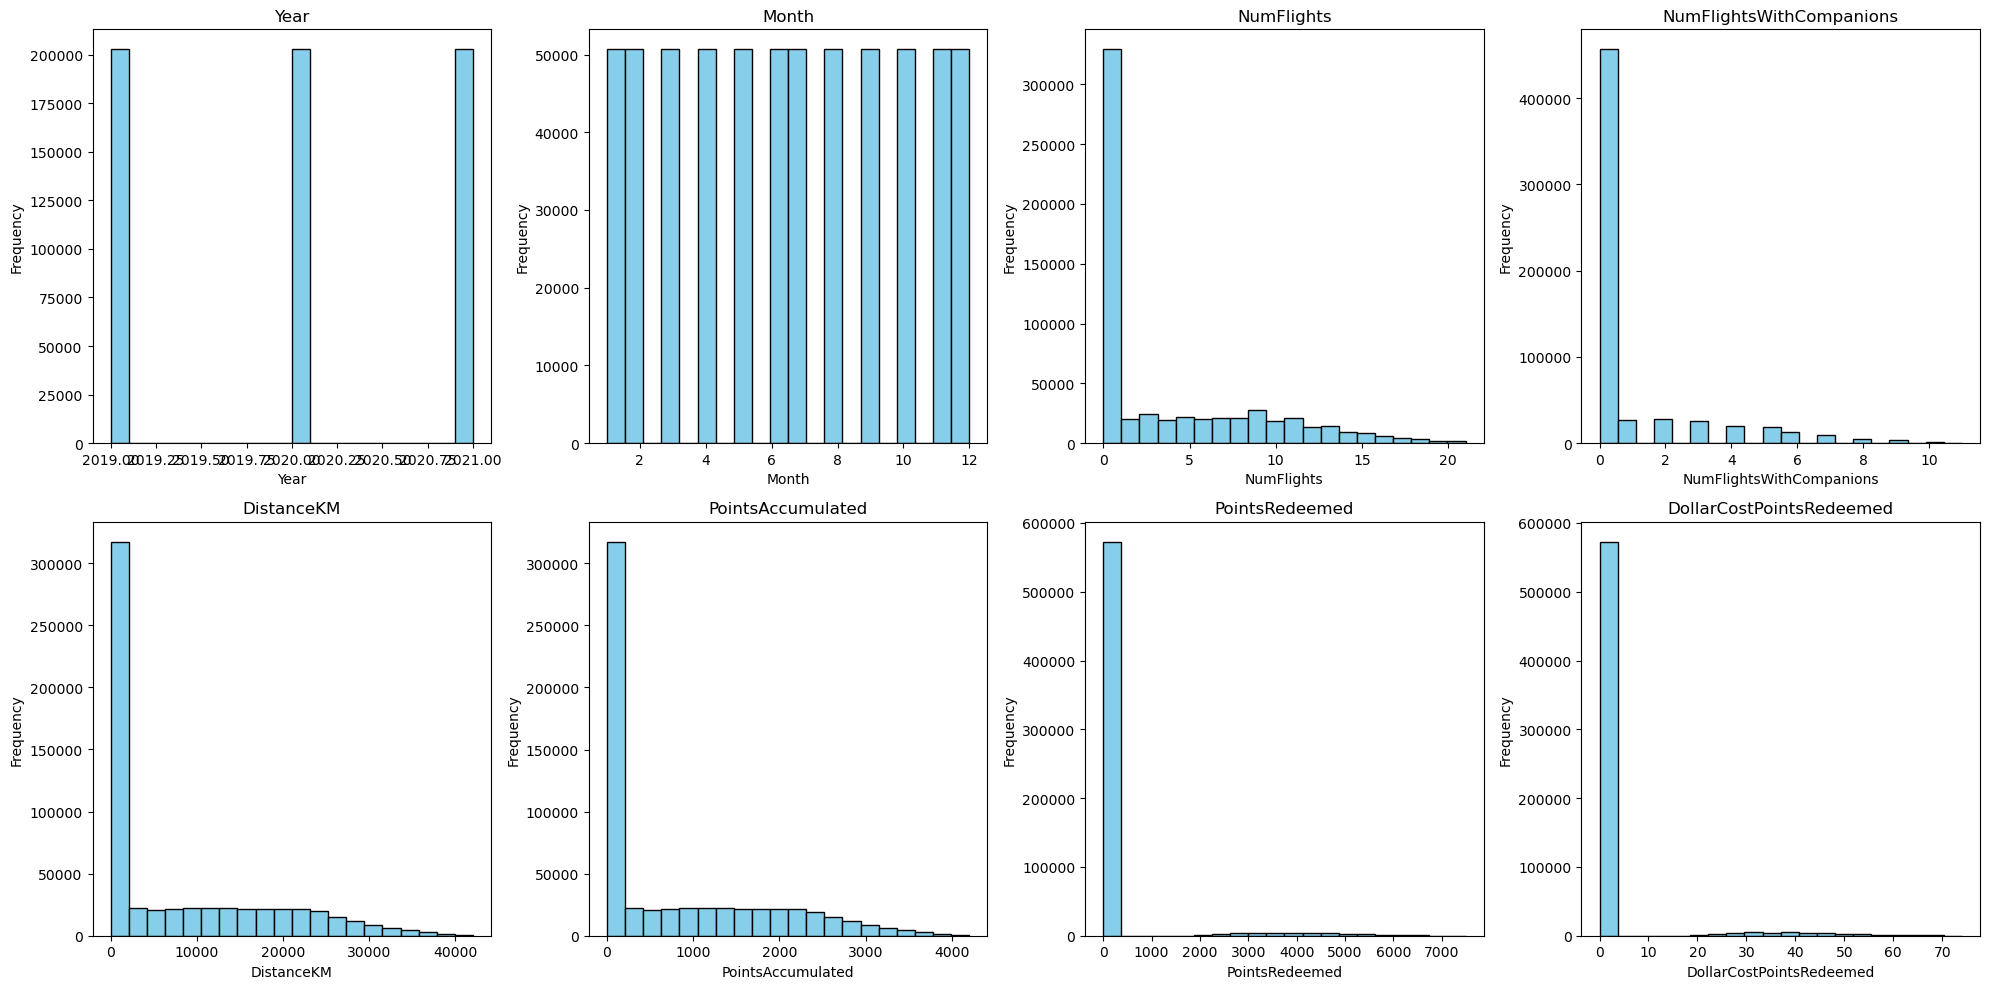

In [51]:
# Determine number of numeric columns
num_cols = len(numerical_columns)

rows = 2
cols = 4
total_plots = rows * cols

# Limit numeric_cols to at most 8 variables (2x4 grid)
plot_cols = numerical_columns[:total_plots]

plt.figure(figsize=(20, 10)) 

for i, col in enumerate(plot_cols):
    plt.subplot(rows, cols, i+1)
    plt.hist(FlightsDB[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()  

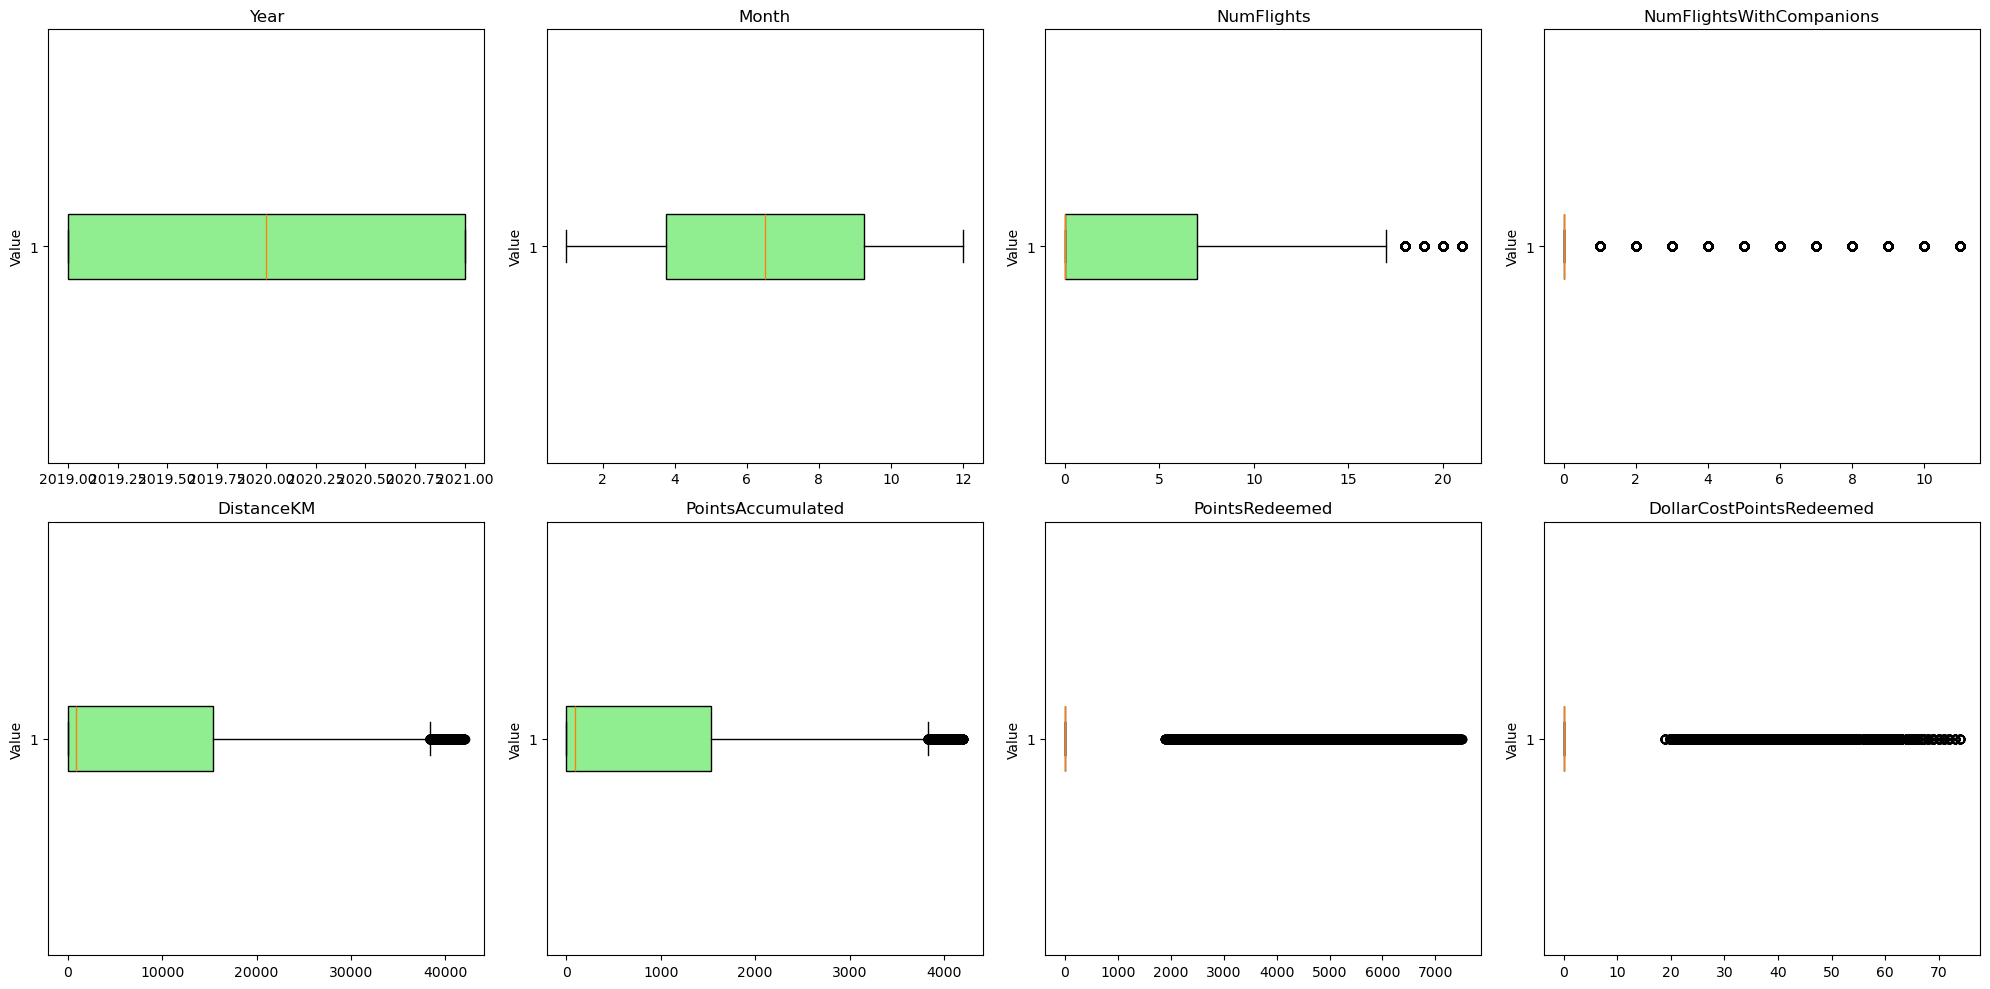

In [52]:
# Set up a grid layout: 2 rows x 4 columns
rows = 2
cols = 4
total_plots = rows * cols

# Limit numeric_cols to at most 8 variables (2x4 grid)
plot_cols = numerical_columns[:total_plots]

plt.figure(figsize=(20, 10))  # Adjust figure size as needed

# Loop through the selected numeric columns
for i, col in enumerate(plot_cols):
    plt.subplot(rows, cols, i+1)
    plt.boxplot(FlightsDB[col], vert=False, patch_artist=True, 
                boxprops=dict(facecolor='lightgreen'))    
    plt.title(col)
    plt.ylabel('Value')

plt.tight_layout()  # Adjust spacing
plt.show()

## Consistency between features

In [53]:
# Group by Loyalty# and sum the relevant numeric columns
loyalty_summary = FlightsDB.groupby('Loyalty#').agg({
    'PointsAccumulated': 'sum',
    'PointsRedeemed': 'sum',
    'NumFlights': 'sum',
    'NumFlightsWithCompanions': 'sum'
}).reset_index()

# Check points consistency: PointsAccumulated >= PointsRedeemed
loyalty_summary['points_consistent'] = loyalty_summary['PointsAccumulated'] >= loyalty_summary['PointsRedeemed']

# Check flights consistency: NumFlights >= NumFlightsWithCompanions
loyalty_summary['flights_consistent'] = loyalty_summary['NumFlights'] >= loyalty_summary['NumFlightsWithCompanions']

# Identify rows where consistency fails
points_issues = loyalty_summary[loyalty_summary['points_consistent'] == False]
flights_issues = loyalty_summary[loyalty_summary['flights_consistent'] == False]

print("Loyalty# with Points Issues (Accumulated < Redeemed):")
print(points_issues)

print("\nLoyalty# with Flights Issues (NumFlights < NumFlightsWithCompanions):")
print(flights_issues)

# Optional: check overall consistency
loyalty_summary['all_consistent'] = loyalty_summary['points_consistent'] & loyalty_summary['flights_consistent']
print(f"\nTotal Loyalty# with full consistency: {loyalty_summary['all_consistent'].sum()} out of {len(loyalty_summary)}")


Loyalty# with Points Issues (Accumulated < Redeemed):
       Loyalty#  PointsAccumulated  PointsRedeemed  NumFlights  \
81       103975               5457            9014          50   
120      106444              12108           12947          47   
170      108857               8036           10549          44   
174      109023              21902           25590         165   
299      116238               6771            6798          48   
...         ...                ...             ...         ...   
16539    989067               7535            8061          23   
16551    989527               7431           10999          39   
16590    991627               4660            8599          16   
16615    992986              26000           28848         182   
16731    999891               4201            6167           1   

       NumFlightsWithCompanions  points_consistent  flights_consistent  
81                           11              False                True  
120    

## Duplicated Rows

In [54]:
# Find fully duplicated rows (identical across all columns)
duplicate_rows = FlightsDB[FlightsDB.duplicated(keep=False)]

# Print the number of fully duplicated rows
print(f"Number of fully duplicated rows: {duplicate_rows.shape[0]}")

# Display the first few duplicated rows
duplicate_rows.head()


Number of fully duplicated rows: 5778


,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
450,727091,2021,12,2021-12-01,0,0,0.0,0,0,0.0
535,369638,2021,12,2021-12-01,0,0,0.0,0,0,0.0
762,750578,2020,6,2020-06-01,0,0,0.0,0,0,0.0
941,547522,2020,6,2020-06-01,0,0,0.0,0,0,0.0
952,819842,2020,6,2020-06-01,0,0,0.0,0,0,0.0


In [55]:
# Remove fully duplicated rows (keeping only the first occurrence)
FlightsDB = FlightsDB.drop_duplicates(keep='first')

# Confirm the result
print(f"New number of rows after removing duplicates: {FlightsDB.shape[0]}")

New number of rows after removing duplicates: 605533


In [56]:
FlightsDB_clean = FlightsDB.to_csv('Flights_DB_clean.csv')